In [2]:
import numpy as np
import pandas as pd
import pathlib
import pandas as pd
from scipy import optimize as opt
from matplotlib import pyplot as plt

from data_downloader.data_client import DolarPrices,PriceHistoryYF

# Portfolio Optimization with MERVAL Stocks

# Get and preprocess data

1. Download data from YF! Api
2. Get USD CCL data from ArgentinaDatos API
3. Rescale ARS prices to USD daily

In [36]:
prices_df.columns

MultiIndex([('Adj Close', 'CEPU.BA'),
            ('Adj Close', 'GGAL.BA'),
            ('Adj Close', 'SAMI.BA')],
           names=['Price', 'Ticker'])

In [63]:
# Download prices data
symbols = ['GGAL.BA','CEPU.BA','SAMI.BA']
prices_df = PriceHistoryYF(symbols)._build_data_frame()
# Filter prices data, we only need close prices
prices_df = prices_df[['Adj Close']]
# Transform multi index into a single index    
prices_df.columns = [idx[1] for idx in prices_df.columns]

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  3 of 3 completed


In [59]:
# Get usd data 
dolar_df = DolarPrices()._build_data_frame('bolsa')

In [70]:
# Rescale prices to USD daily
for day in prices_df.index:
    prices_df.loc[day] /= dolar_df.loc[day]['venta']

<Axes: xlabel='Date'>

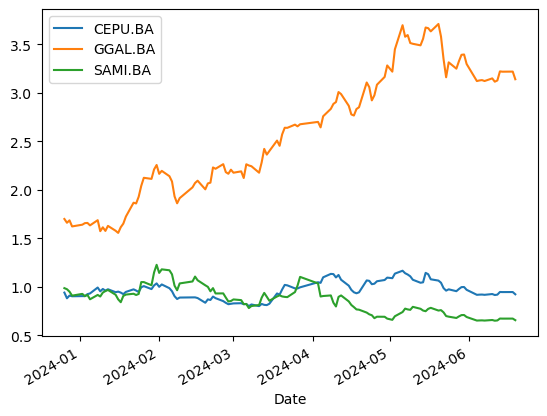

In [71]:
prices_df.plot()